### 연습문제
1. csv폴더에 있는 'Sales Records.csv 파일 로드 
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼을 삭제
3. 컬럼의 이름을 변경 -> ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '개수', '단가', '원가']
4. 대륙, 국가를 기준으로 오름차순 정렬
5. 기존의 인덱스는 삭제하고 새로운 인덱스 생성
6. 파생변수 생성
    - 총단가 = 개수 * 단가
    - 총원가 = 개수 * 원가
    - 총이윤 = 총단가 - 총원가

In [1]:
# 라이브러리 로드 
import pandas as pd

In [2]:
# 1. Sales Records.csv 파일 로드 
sales = pd.read_csv('../csv/Sales Records.csv')
sales.head(1)

Region Country        Item Type Sales Channel Order Priority  \
0  Sub-Saharan Africa    Chad  Office Supplies        Online              L   

  Order Date   Order ID  Ship Date  Units Sold  Unit Price  Unit Cost  \
0  1/27/2011  292494523  2/12/2011        4484      651.21     524.96   

   Total Revenue  Total Cost  Total Profit  
0     2920025.64  2353920.64      566105.0

In [6]:
# 2. 특정 컬럼을 제거 
df = sales.drop(['Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel'] ,axis=1)

In [10]:
# 컬럼의 이름을 변경
# rename()을 사용하여 컬럼의 이름을 변경
df.rename(
    columns= {
        'Region' : '대륙', 
        'Country' : '국가', 
        'Item Type' : '상품종류', 
        'Order Priority' : '우선순위', 
        'Order Date' : '주문일자', 
        'Ship Date' : '발송일자', 
        'Units Sold' : '개수', 
        'Unit Price' : '단가', 
        'Unit Cost' : '원가'
    }
)

df.columns = ['대륙', '국가', '상품종류', '우선순위', '주문일자', 
              '발송일자', '개수', '단가', '원가']

In [ ]:
df.head(1)

In [14]:
# 대륙, 국가를 기준으로 오름차순 정렬
df.sort_values(['대륙', '국가'], ascending=True, inplace=True)

In [16]:
# 인덱스를 초기화 기존의 인덱스는 제거 
df.reset_index(drop=True, inplace=True)

In [17]:
# 새로운 파생변수 -> 총단가, 총원가, 총이윤
df['총단가'] = df['개수'] * df['단가']
df['총원가'] = df['개수'] * df['원가']
df['총이윤'] = df['총단가'] - df['총원가']

In [ ]:
df.head(1)

In [ ]:
df.info()

1. 국가별로 그룹화 그룹화 연산 총이윤의 합계
2. 총이윤을 기준으로 내림차순 정렬
3. 상위 10개의 데이터를 출력
4. South Korea을 순위가 몇위인가?

In [22]:
group_data = df[ ['국가', '총이윤'] ].groupby(['국가']).sum()

In [23]:
group_data.head(1)

총이윤
국가                      
Afghanistan  22977020.06

In [25]:
# group_data의 총이윤을 기준으로 내림차순 정렬
group_data.sort_values(['총이윤'], ascending=False, inplace=True)

In [ ]:
# 상위 10개의 나라를 출력
group_data.head(10)

In [30]:
group_data.reset_index(drop=False, inplace=True)

In [39]:
group_data.loc[ 
    group_data['국가'] == 'South Korea'
    ].values[0][1]

23893933.75

In [32]:
# 그래프 시각화 라이브러리 로드 
import matplotlib.pyplot as plt

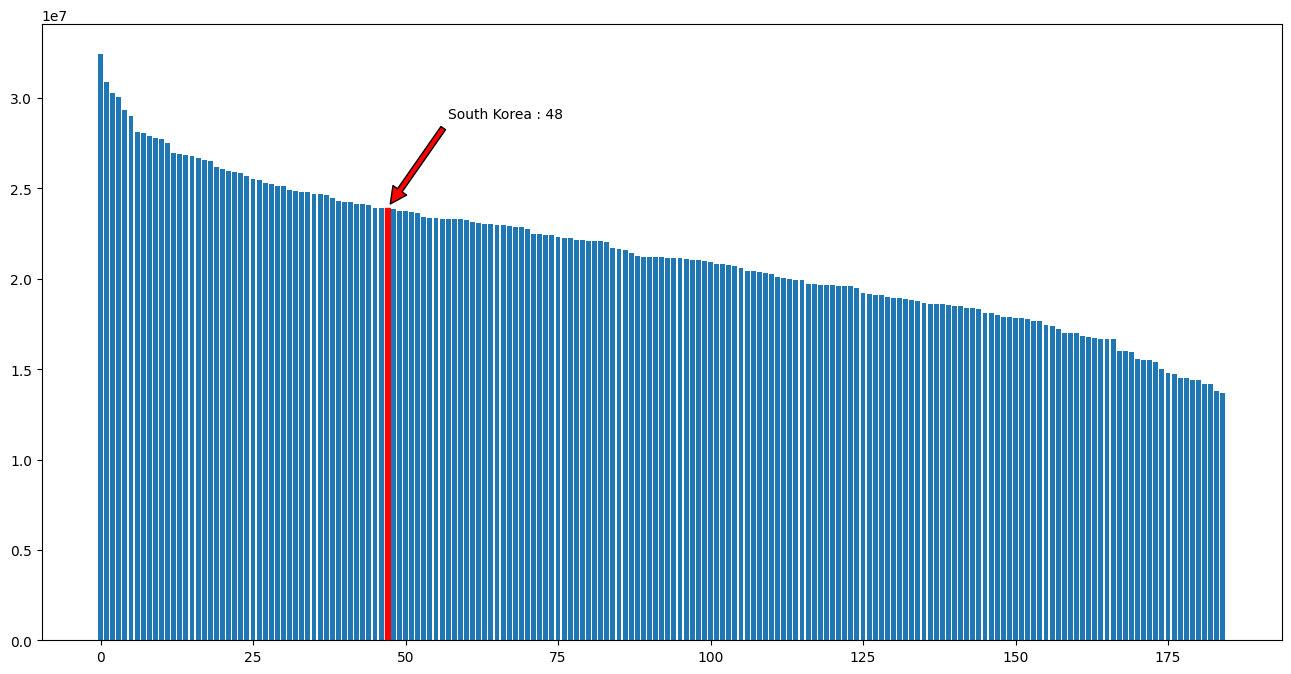

In [43]:
# 바형 그래프의 x축 데이터
x = group_data.index
# 바형 그래프의 y축 데이터
y = group_data['총이윤']

# 한국의 인덱스값 출력
korea_index = group_data.loc[ group_data['국가'] == 'South Korea' ].index[0]
# 한국의 총이윤 값을 출력
korea_data = group_data.loc[ korea_index , '총이윤' ]


# 그래프 사이즈를 변경
plt.figure(figsize=(16, 8))

bar_list = plt.bar(x, y)

# bar_list에 있는 korea_index위치의 막대를 선택하여 옵션을 변경
bar_list[korea_index].set_color('r')

# 그래프에 주석을 추가 
plt.annotate(
    "South Korea : " + str(korea_index + 1), # 주석의 문자열
    xytext = (korea_index + 10, korea_data + 5000000), #주석 문자열의 위치
    xy = (korea_index, korea_data), # 주석이 설명하는 좌표
    arrowprops = dict(
        facecolor = 'r', 
        shrink = 0.05
    )
)


plt.show()